# Exploratory Data Analysis

In [423]:
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.81 ms


In [424]:
import sys
sys.path.append('../')

time: 780 µs


In [425]:
from IPython.display import display
from pathlib import Path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import PlaintextCorpusReader, stopwords
from nltk import FreqDist
import cytoolz as tlz
import string
import zipfile

import seaborn as sns
import spacy
from scipy import sparse
from nltk.stem import WordNetLemmatizer
from nltk.data import ZipFilePathPointer
from spacy.matcher import PhraseMatcher, Matcher
from sklearn import feature_extraction as fe
from textacy import Corpus
from textacy.ke.textrank import textrank
from textacy.ke.sgrank import sgrank
from textacy.ke.scake import scake
from textacy.ke.yake import yake

import pandas as pd

from keyword_extractor.extractors import TfIdfKeywordExtractor

sns.set()

time: 17 ms


'en'

time: 1.99 ms


In [5]:
DATADIR = Path('../data')

time: 768 µs


In [ ]:
DATADIR.joinpath('corpus.zip').as_posix()

In [334]:
zf = zipfile.ZipFile(DATADIR.joinpath('corpus.zip').as_posix())

time: 1.55 ms


In [335]:
zf.filelist

[<ZipInfo filename='test docs/doc1.txt' compress_type=deflate external_attr=0x20 file_size=14424 compress_size=6051>,
 <ZipInfo filename='test docs/doc2.txt' compress_type=deflate external_attr=0x20 file_size=25925 compress_size=10366>,
 <ZipInfo filename='test docs/doc3.txt' compress_type=deflate external_attr=0x20 file_size=17015 compress_size=7026>,
 <ZipInfo filename='test docs/doc4.txt' compress_type=deflate external_attr=0x20 file_size=18558 compress_size=7792>,
 <ZipInfo filename='test docs/doc5.txt' compress_type=deflate external_attr=0x20 file_size=25155 compress_size=9925>,
 <ZipInfo filename='test docs/doc6.txt' compress_type=deflate external_attr=0x20 file_size=11626 compress_size=4913>]

time: 5.36 ms


In [337]:
text_corpus2 = PlaintextCorpusReader(ZipFilePathPointer(zf), '.*\.txt')


time: 1.71 ms


In [338]:
text_corpus2.ensure_loaded()
text_corpus2.fileids()

['test docs/doc1.txt',
 'test docs/doc2.txt',
 'test docs/doc3.txt',
 'test docs/doc4.txt',
 'test docs/doc5.txt',
 'test docs/doc6.txt']

time: 2.07 ms


In [322]:
text_corpus2.fileids()

[]

time: 10.1 ms


In [6]:
text_corpus = PlaintextCorpusReader(DATADIR.joinpath('text_corpus').as_posix(), 'doc.*\.txt')
english_stopwords = set(stopwords.words('english'))

time: 5.44 ms


In [10]:
print(f'there is {len(text_corpus.fileids())} documents in the corpus')

there is 6 documents in the corpus
time: 1.38 ms


In [11]:
def get_text_stats(corpus: PlaintextCorpusReader, fileid):
    text = corpus.raw(fileid)
    words = corpus.words(fileid)
    sentences = corpus.sents(fileid)
    
    print(f'char length: {len(text)}')
    print(f'word counts: {len(words)}')
    print(f'average word length: {np.mean([len(w) for w in words])}')
    print(f'sentence counts: {len(sentences)}')
    print(f'average sentence length: {np.mean([len(sent) for sent in sentences])}')
    
    doc_start = " ".join(tlz.concat(sentences[:2]))
    mid_i = int(len(sentences)/2)
    doc_mid = " ".join(tlz.concat(sentences[mid_i:mid_i+2]))
    doc_end = " ".join(tlz.concat(sentences[-2:]))

    print(f'start/end of doc:\n{doc_start}\n...\n{doc_mid}\n...\n{doc_end}')
    
    
def show_wordcloud(text):
    wordcloud = WordCloud().generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    


time: 4.12 ms


Word clouds can provide us a quick and dirty way to identify the most common words in the documents. Given the small size of our corpus we can afford to display one for each document.

In [148]:
sentences = text_corpus.sents(fileid)

time: 920 µs


==================== doc1.txt ====================
char length: 14424
word counts: 3078
average word length: 3.826185834957765
sentence counts: 133
average sentence length: 23.142857142857142
start/end of doc:
Let me begin by saying thanks to all you who ' ve traveled , from far and wide , to brave the cold today . We all made this journey for a reason .
...
We ' ll have to make hard choices . And although government will play a crucial role in bringing about the changes we need , more money and programs alone will not get us where we need to go .
...
And if you will join me in this improbable quest , if you feel destiny calling , and see as I see , a future of endless possibility stretching before us ; if you sense , as I sense , that the time is now to shake off our slumber , and slough off our fear , and make good on the debt we owe past and future generations , then I ' m ready to take up the cause , and march with you , and work with you . Together , starting today , let us finish

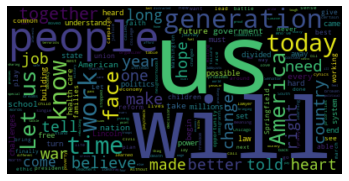

==================== doc2.txt ====================
char length: 25925
word counts: 5454
average word length: 3.877154382104877
sentence counts: 226
average sentence length: 24.13274336283186
start/end of doc:
To Chairman Dean and my great friend Dick Durbin ; and to all my fellow citizens of this great nation ; With profound gratitude and great humility , I accept your nomination for the presidency of the United States . Let me express my thanks to the historic slate of candidates who accompanied me on this journey , and especially the one who traveled the farthest - a champion for working Americans and an inspiration to my daughters and to yours -- Hillary Rodham Clinton .
...
And as someone who watched my mother argue with insurance companies while she lay in bed dying of cancer , I will make certain those companies stop discriminating against those who are sick and need care the most . Now is the time to help families with paid sick days and better family leave , because nobody in A

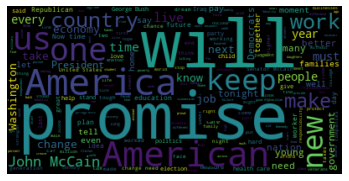

==================== doc3.txt ====================
char length: 17015
word counts: 3730
average word length: 3.7048257372654154
sentence counts: 161
average sentence length: 23.167701863354036
start/end of doc:
Thank you . Thank you Roger Hickey and Bob Borosage for bringing us all together today and thank you for your leadership in the cause of a more progressive America .
...
You know , we all remember that George Bush said in 2000 campaign that he was against nation - building . We just didn ' t know he was talking about this one .
...
They can say that this was the time when America found its way . They can say that this was the time when America learned to dream again .


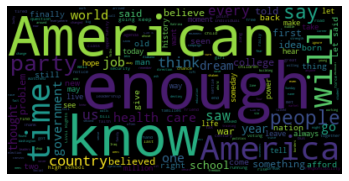

==================== doc4.txt ====================
char length: 18558
word counts: 3627
average word length: 4.21119382409705
sentence counts: 127
average sentence length: 28.559055118110237
start/end of doc:
The first time I came to Kenya was in 1987 . I had just finished three years of work as a community organizer in low - income neighborhoods of Chicago , and was about to enroll in law school .
...
I know that while recent reports have pointed to strong economic growth in this country , 56 % of Kenyans still live in poverty . And I know that the vast majority of people in this country desperately want to change this .
...
I wish all of you luck in finding this courage in the days and months to come , and I want you to know that as your ally , your friend , and your brother , I will be there to help in any way I can . Thank you .


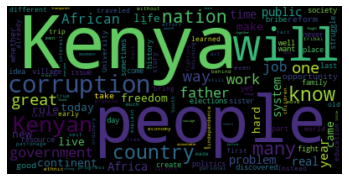

==================== doc5.txt ====================
char length: 25075
word counts: 4816
average word length: 4.299626245847176
sentence counts: 199
average sentence length: 24.201005025125628
start/end of doc:
Throughout American history , there have been moments that call on us to meet the challenges of an uncertain world , and pay whatever price is required to secure our freedom . They are the soul - trying times our forbearers spoke of , when the ease of complacency and self - interest must give way to the more difficult task of rendering judgment on what is best for the nation and for posterity , and then acting on that judgment ?
...
but it should not depend on Iraqi approval . I am not suggesting that this timetable be overly - rigid .
...
And it is time to refocus America ’ s efforts on the wider struggle yet to be won . Thank you .


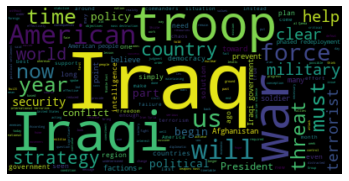

==================== doc6.txt ====================
char length: 11626
word counts: 2234
average word length: 4.319158460161146
sentence counts: 91
average sentence length: 24.54945054945055
start/end of doc:
Good morning . As some of you know , Senator Lugar and I recently traveled to Russia , Ukraine , and Azerbaijan to witness firsthand both the progress we ' re making in securing the world ' s most dangerous weapons , as well as the serious challenges that lie ahead .
...
This was two letters . Fortunately , however , we ' ve made some good progress on this front .
...
Much of what President Kennedy described in 1963 remains true to this day - and we owe it to ourselves and our children to get it right . Thank you .


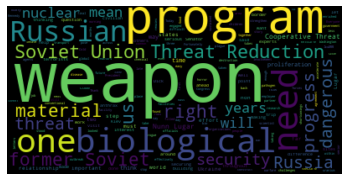

time: 3.02 s


In [12]:
for fileid in text_corpus.fileids():
    print('=' * 20, fileid, '=' * 20)
    get_text_stats(text_corpus, fileid)
    show_wordcloud(text_corpus.raw(fileid))

#### Comment:
All the documents in the corpus are political speeches from U.S politicians. 
`doc{1, 3}` appear to be election speech, `doc4` is probably a speech from Obama on its first trip to Kenya, the country where is father grew up.
`doc5` is about the U.S. involvement in Irak and `doc6` focuses on matter of international security.

Because the task requires us to derive insight at the corpus level, the rest of the EDA will operate on the whole corpus.

Corpus Level Word Cloud


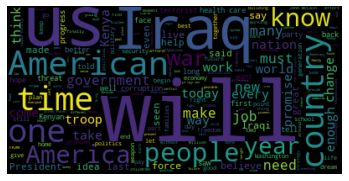

time: 559 ms


In [13]:
print('Corpus Level Word Cloud')
show_wordcloud(text_corpus.raw())

## Extract most common terms in context

In [230]:
# lemmatizer = WordNetLemmatizer()
# lemmatized_words = (lemmatizer.lemmatize(w.lower())
#                      for w in text_corpus.words())
word_freq = FreqDist(w.lower()
                     for w in text_corpus.words()
                     if not (w.lower() in english_stopwords or w in string.punctuation))

time: 39.6 ms


In [231]:
word_freq

FreqDist({'us': 87, 'people': 68, 'iraq': 64, 'country': 60, 'time': 60, 'one': 58, 'america': 54, 'know': 52, 'let': 49, 'american': 49, ...})

time: 2.34 ms


In [232]:
# lemmatized_words


time: 623 µs


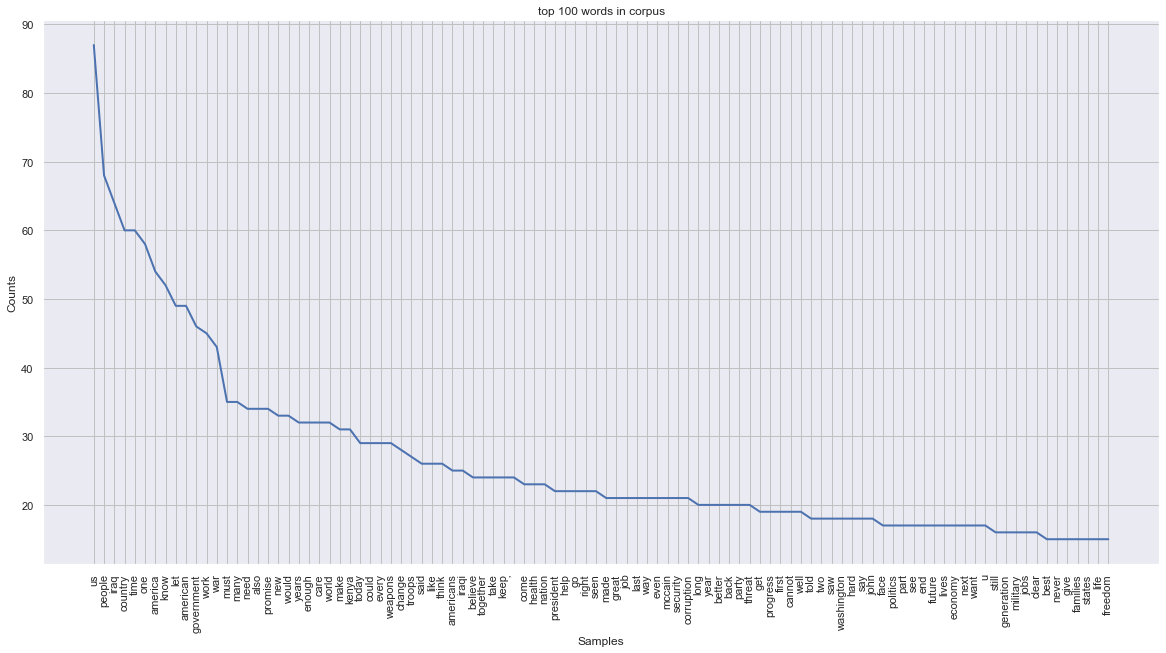

time: 2.53 s


In [233]:
plt.figure(figsize=(20, 10))
word_freq.plot(100, title='top 100 words in corpus')

Term frequency at the corpus level doesn't appear to add much information to what we learned so far. We could start to use syntactic information and integrate more powerful libraries to our workflow

In [315]:
tfidf = fe.text.TfidfVectorizer(stop_words='english', ngram_range=(1, 1))

time: 1 ms


In [353]:
term_freq_matrix = tfidf.fit_transform([text_corpus.raw(fid) for fid in text_corpus.fileids()])
if sparse.issparse(term_freq_matrix):
    term_freq_matrix = term_freq_matrix.toarray()
vocab = np.array(list(tfidf.vocabulary_.keys()))

time: 197 ms


In [354]:
argsort = np.argsort(term_freq_matrix)

time: 1.29 ms


In [356]:
argsort

array([[3025, 2642, 2641, ..., 2900, 1150, 1568],
       [3025, 1409, 1408, ...,  132, 1688, 2081],
       [   0, 1875, 1877, ...,  795, 1922, 2900],
       [   0, 1879, 1880, ..., 1493,  570, 1492],
       [2372, 1415, 1414, ..., 2808, 1450, 1449],
       [   0, 1905, 1906, ..., 2074, 2966, 2732]])

time: 2.1 ms


In [368]:
top_kw_idx = np.flip(argsorted[0, -5:])
top_kw_idx

array([1568, 1150, 2900, 1953, 1512])

time: 2.28 ms


In [369]:
vocab[top_kw_idx]

array(['dover', 'osama', 'dramatically', 'impressive', 'span'],
      dtype='<U16')

time: 1.99 ms


In [370]:
term_freq_matrix[0, top_kw_idx]

array([0.38463211, 0.17497565, 0.1547278 , 0.1547278 , 0.14282566])

time: 3.89 ms


In [342]:
[vocab[np.flip(argsort[i, -5:])].flatten().tolist() for i in range(term_freq_matrix.shape[0])]

[['dover', 'osama', 'dramatically', 'impressive', 'span'],
 ['growing', 'jonathan', 'rights', 'believed', 'finds'],
 ['dramatically', 'international', 'finds', 'rights', 'lynchings'],
 ['prosper', 'ones', 'search', 'impressive', 'boy'],
 ['civic', 'confidence', 'laboratory', 'warning', 'lawyer'],
 ['material', 'dismantled', 'significantly', 'realities', 'regard']]

time: 3.74 ms


In [357]:
argsorted = np.argsort(term_freq_matrix)

time: 1.98 ms


In [320]:
# topn = 10
# keywords = vocab[np.flip(argsort[5, -topn:])]
# for kw in keywords:
#     for (text, sents) in 
#     if not kw in text_corpus.raw(fid) 

time: 3.81 ms


## Apply standard Keyword extraction algorithms.

Let's see what some common keyword extraction methods get us.

In [17]:
nlp = spacy.load('en_core_web_md')

time: 16.4 s


In [26]:
corpus_doc = nlp('\n\n'.join(text_corpus.raw(fid) for fid in text_corpus.fileids()))

time: 2.32 s


In [48]:
data = ((text_corpus.raw(fid), {'fileid': fid}) for fid in text_corpus.fileids())
corpus = Corpus(nlp, data)

time: 3.97 s


In [189]:
word_freq

FreqDist({'us': 87, 'people': 68, 'iraq': 64, 'country': 60, 'time': 60, 'one': 58, 'america': 54, 'know': 52, 'let': 49, 'american': 49, ...})

time: 4.93 ms


In [593]:
included_pos=('NOUN', 'PROPN', 'ADJ', 'VERB')
topn = 15
cols = ['keyword', 'score']

time: 2.12 ms


In [58]:
def show_table(data, cols):
    display(pd.DataFrame(data, columns=cols))

time: 1.7 ms


In [60]:
show_table(textrank(corpus_doc, edge_weighting='count', include_pos=included_pos, topn=topn), cols)

,keyword,score
0,american people,0.004051
1,biological weapon threat reduction program,0.003688
2,well country,0.003682
3,new time,0.003514
4,great country,0.003488
5,iraqi people,0.003475
6,well America,0.003311
7,broad threat America,0.003206
8,second thing people,0.003137
9,american promise,0.003099


time: 216 ms


In [61]:
show_table(yake(corpus_doc, include_pos=included_pos, topn=topn), cols)

,keyword,score
0,Iraq,0.037309
1,America,0.044172
2,american people,0.059240
3,Kenya,0.067475
4,United States,0.073048
5,Americans,0.081834
6,President,0.088373
7,Washington,0.096870
8,John,0.098742
9,country,0.104036


time: 231 ms


In [44]:
show_table(sgrank(corpus_doc, topn=topn), cols)

[('health care', 0.07054183764957285),
 ('United States', 0.05210628762800092),
 ('country', 0.04501932542702663),
 ('people', 0.041666397857731186),
 ('John McCain', 0.03326356889544003),
 ('time', 0.0298424259198081),
 ('year', 0.027970657486522204),
 ('war', 0.02700185101046419),
 ('today', 0.02307957263735923),
 ('government', 0.022376223231994074),
 ('job', 0.020490264420864393),
 ('Iraq', 0.020266884202431532),
 ('american', 0.016988975212586636),
 ('great', 0.01561284707224271),
 ('family', 0.015088148954376355)]

time: 2min 28s


In [45]:
show_table(scake(corpus_doc, topn=topn), cols)

[('american people', 7814.184955861931),
 ('young people', 7315.475849113382),
 ('problem people', 7222.992587221005),
 ('iraqi people', 7183.064335911105),
 ('second thing people', 7127.345810833128),
 ('kenyan people', 7098.165443140675),
 ('honest people', 7082.865463414564),
 ('cynicism people', 7082.505796283965),
 ('ordinary people', 7082.082519021365),
 ('gay people', 7081.914931668631),
 ('indigenous people', 7080.581032546963),
 ('stupid people', 7080.566826768464),
 ('great country', 6587.624753180902),
 ('well country', 6066.917635235616),
 ('country safe', 5762.9036301627775)]

time: 14 s


In [177]:
def extract_parent_sentences(doc, keywords):
    matcher = Matcher(nlp.vocab)
    patterns = [[{'LEMMA': tok} for tok in kw.split()] for kw in keywords]
    matcher.add("Keywords", patterns)
    matches = matcher(doc)
    results = {kw: [] for kw in keywords}
    for match_id, start, end in matches:
        span = doc[start:end]
        sent = span.sent
        results[span.lemma_].append(sent)
    return results

time: 1.62 ms


In [183]:
keywords_info = {}
for doc in corpus:
    fileid = doc._.meta['fileid']
    results = textrank(doc, edge_weighting='count', include_pos=included_pos, topn=topn)
    for keyword, score in results:
        if keyword not in keywords_info:
            keywords_info[keyword] = {'scores': [], 'fileids': [], 'sents': []}
        
        keywords_info[keyword]['scores'].append(score)
        keywords_info[keyword]['fileids'].append(fileid)
    
    current_keywords = [r[0] for r in results]
    sentences = extract_parent_sentences(doc, current_keywords)
    for keyword, sents in sentences.items():
        keywords_info[keyword]['sents'].extend(sents)
        

time: 385 ms


In [185]:
for kw, info in keywords_info.items():
    if len(info['fileids']) > 1:
        print(kw)
        print(info)

hard work
{'scores': [0.005602531671398835, 0.004869194086360218], 'fileids': ['doc1.txt', 'doc2.txt'], 'sents': [Let us begin this hard work together., It is that promise that has always set this country apart - that through hard work and sacrifice, each of us can pursue our individual dreams but still come together as one American family, to ensure that the next generation can pursue their dreams as well.
, This country is more decent than one where a woman in Ohio, on the brink of retirement, finds herself one illness away from disaster after a lifetime of hard work.
, She's the one who taught me about hard work.]}
american people
{'scores': [0.004449713082238925, 0.0041236418637656536, 0.004108661953736638, 0.005366477751593343], 'fileids': ['doc1.txt', 'doc2.txt', 'doc3.txt', 'doc5.txt'], 'sents': [It was here, in Springfield, where North, South, East and West come together that I was reminded of the essential decency of the American people - where I came to believe that through t

In [613]:
list(zip(*[(1, 'a'), (2, 'b')]))

[(1, 2), ('a', 'b')]

time: 2.15 ms


In [176]:
keyword_dfs = {}
for doc in corpus:
    fileid = doc._.meta['fileid']
    print(fileid)
    df = pd.DataFrame(textrank(doc, edge_weighting='count', include_pos=included_pos, topn=topn), columns=['keywords', 'score'])
    keywords = df['keywords']
    sentences = pd.Series(extract_parent_sentences(doc, keywords), name='sentences')
    df['fileid'] = fileid
    keyword_dfs[fileid] = df
    display(df.merge(sentences, left_on='keywords', right_index=True))


doc1.txt


,keywords,score,fileid,sentences
0,hard work,0.005603,doc1.txt,"[(Let, us, begin, this, hard, work, together, .)]"
1,future generation proud,0.005559,doc1.txt,"[(Let, 's, be, the, generation, that, makes, f..."
2,new generation,0.004580,doc1.txt,"[(Each, and, every, time, ,, a, new, generatio..."
3,well America,0.004553,doc1.txt,"[(And, I, accepted, the, job, ,, sight, unseen..."
4,problem people,0.004536,doc1.txt,"[(I, saw, that, the, problems, people, faced, ..."
5,american people,0.004450,doc1.txt,"[(It, was, here, ,, in, Springfield, ,, where,..."
6,health care crisis,0.004405,doc1.txt,"[(Let, 's, be, the, generation, that, finally,..."
7,health care cost,0.004298,doc1.txt,"[(,, we, 've, been, told, that, the, anxiety, ..."
8,gay people,0.004205,doc1.txt,"[(We, 're, distracted, from, our, real, failur..."
9,universal health care,0.003935,doc1.txt,"[(Let, 's, be, the, generation, that, says, ri..."


doc2.txt


,keywords,score,fileid,sentences
0,american promise,0.007081,doc2.txt,"[(We, meet, at, one, of, those, defining, mome..."
1,American promise alive,0.006017,doc2.txt,"[(This, moment, -, this, election, -, is, our,..."
2,new time,0.005724,doc2.txt,"[(Change, happens, because, the, American, peo..."
3,fundamental promise,0.005440,doc2.txt,"[(The, fundamentals, we, use, to, measure, eco..."
4,John McCain,0.005156,doc2.txt,"[(The, Republican, nominee, ,, John, McCain, ,..."
5,hard work,0.004869,doc2.txt,"[(It, is, that, promise, that, has, always, se..."
6,well country,0.004706,doc2.txt,"[(We, are, a, better, country, than, this, ., ..."
7,America safe,0.004649,doc2.txt,"[(That, wo, n't, keep, America, safe, .)]"
8,new job,0.004509,doc2.txt,"[(We, measure, progress, in, the, 23, million,..."
9,average american family,0.004427,doc2.txt,"[(We, measure, progress, in, the, 23, million,..."


doc3.txt


,keywords,score,fileid,sentences
0,health care plan,0.005683,doc3.txt,"[(The, party, that, wo, n't, make, Americans, ..."
1,accessible health care,0.005487,doc3.txt,"[(Let, it, be, said, that, we, are, the, party..."
2,health care system,0.005485,doc3.txt,"[(The, party, that, wo, n't, just, throw, a, f..."
3,second thing people,0.004968,doc3.txt,"[(And, the, second, thing, people, would, ask,..."
4,energy independent America,0.004633,doc3.txt,"[(Let, it, be, said, that, we, are, the, party..."
5,second world war,0.004420,doc3.txt,"[(I, 've, thought, about, how, she, lived, to,..."
6,child care,0.004315,doc3.txt,"[(We, 've, seen, the, cost, of, health, care, ..."
7,american people,0.004109,doc3.txt,"[(And, when, we, do, go, to, war, ,, let, us, ..."
8,new world,0.003798,doc3.txt,"[(And, with, this, new, world, comes, new, ris..."
9,progressive America,0.003780,doc3.txt,"[(Thank, you, Roger, Hickey, and, Bob, Borosag..."


doc4.txt


,keywords,score,fileid,sentences
0,kenyan people,0.008087,doc4.txt,"[(Today, ,, we, 're, starting, to, see, that, ..."
1,strong Kenya,0.007915,doc4.txt,"[(And, you, will, determine, the, direction, o..."
2,great country,0.006196,doc4.txt,"[(By, rejecting, the, insulting, idea, that, c..."
3,great nation,0.005866,doc4.txt,"[(We, have, the, opportunity, to, muster, the,..."
4,ordinary people,0.005681,doc4.txt,"[(The, history, of, Africa, is, a, history, of..."
5,honest people,0.005639,doc4.txt,"[(it, is, a, crisis, -, a, crisis, that, 's, r..."
6,young people,0.005424,doc4.txt,"[(Looking, out, at, this, crowd, of, young, pe..."
7,indigenous people,0.005210,doc4.txt,"[(It, suffers, from, the, legacy, of, colonial..."
8,kenyan father,0.005153,doc4.txt,"[(Certainly, it, is, not, due, to, lack, of, e..."
9,official corruption,0.005017,doc4.txt,"[(Some, of, the, worst, actors, on, the, inter..."


doc5.txt


,keywords,score,fileid,sentences
0,bipartisan Iraq Study Group,0.010190,doc5.txt,"[(A, year, that, is, ending, with, an, attempt..."
1,northern Iraq,0.008986,doc5.txt,"[(Drawing, down, our, troops, in, Iraq, will, ..."
2,iraqi security force,0.008983,doc5.txt,"[(300,000, Iraqi, security, forces, have, supp..."
3,american troop level,0.008498,doc5.txt,"[(300,000, Iraqi, security, forces, have, supp..."
4,urgent iraqi political issue,0.007393,doc5.txt,"[(“, rejected, the, notion, of, an, American, ..."
5,unified iraqi government,0.007010,doc5.txt,"[(In, the, absence, of, a, genuine, commitment..."
6,american force,0.006690,doc5.txt,"[(It, ’s, not, clear, that, these, troop, leve..."
7,U.S. troop,0.006014,doc5.txt,"[(a, phased, redeployment, of, U.S., troops, f..."
8,iraqi people,0.005923,doc5.txt,"[(The, President, should, announce, to, the, I..."
9,iraqi soldier,0.005632,doc5.txt,"[(An, increase, in, the, quality, and, quantit..."


doc6.txt


,keywords,score,fileid,sentences
0,biological weapon threat reduction program,0.022234,doc6.txt,"[(I, want, to, turn, to, a, second, critical, ..."
1,soviet biological weapon program,0.017537,doc6.txt,"[(This, is, a, city, of, two, and, a, half, mi..."
2,Cooperative Threat Reduction program,0.012236,doc6.txt,"[(And, the, Kiev, story, is, heading, in, the,..."
3,weapon grade material,0.011480,doc6.txt,"[(We, 've, heard, the, horror, stories, -, att..."
4,improvised nuclear weapon,0.010875,doc6.txt,"[(In, a, way, that, balances, the, needs, of, ..."
5,dangerous weapon,0.010278,doc6.txt,"[(As, some, of, you, know, ,, Senator, Lugar, ..."
6,Lugar program site,0.010245,doc6.txt,"[(And, it, means, more, sustained, engagement,..."
7,soviet weapon scientist,0.010118,doc6.txt,"[(We, 've, heard, the, horror, stories, -, att..."
8,heavy conventional weapon,0.009528,doc6.txt,"[(On, our, trip, ,, we, saw, two, areas, where..."
9,weapon expert,0.009306,doc6.txt,"[(Some, weapons, experts, believe, that, terro..."


time: 509 ms


In [147]:
keywords = keyword_dfs['doc1.txt']['keywords']
matcher = Matcher(nlp.vocab)
patterns = [[{'LEMMA': tok} for tok in kw.split()] for kw in keywords]
matcher.add("Keywords", patterns)

time: 1.8 ms


In [139]:
patterns

[[{'LEMMA': 'hard'}, {'LEMMA': 'work'}],
 [{'LEMMA': 'future'}, {'LEMMA': 'generation'}, {'LEMMA': 'proud'}],
 [{'LEMMA': 'new'}, {'LEMMA': 'generation'}],
 [{'LEMMA': 'well'}, {'LEMMA': 'America'}],
 [{'LEMMA': 'problem'}, {'LEMMA': 'people'}],
 [{'LEMMA': 'american'}, {'LEMMA': 'people'}],
 [{'LEMMA': 'health'}, {'LEMMA': 'care'}, {'LEMMA': 'crisis'}],
 [{'LEMMA': 'health'}, {'LEMMA': 'care'}, {'LEMMA': 'cost'}],
 [{'LEMMA': 'gay'}, {'LEMMA': 'people'}],
 [{'LEMMA': 'universal'}, {'LEMMA': 'health'}, {'LEMMA': 'care'}],
 [{'LEMMA': 'well'}, {'LEMMA': 'job'}],
 [{'LEMMA': 'economy'}, {'LEMMA': 'change'}],
 [{'LEMMA': 'cold'}, {'LEMMA': 'today'}],
 [{'LEMMA': 'audience'}, {'LEMMA': 'today'}],
 [{'LEMMA': 'well'}, {'LEMMA': 'school'}]]

time: 3.87 ms


In [116]:
kw = 'hard work'
kw_len = len(kw)
kw_idx = doc.text.find('hard work')
if kw_idx != -1:
    span = doc.char_span(kw_idx, kw_idx+kw_len)

time: 4.91 ms


In [132]:
def extract_sent(doc, keyword):
    kw_len = len(keyword)
    kw_idx = doc.text.find(keyword)
    if kw_idx != -1:
        span = doc.char_span(kw_idx, kw_idx+kw_len)
        if span:
            sent = span.sent
        else:
            sent = None
    else:
        sent = None
    return sent

time: 1.55 ms


In [137]:
df = keyword_dfs['doc1.txt']
df['sents'] = df['keywords'].apply(lambda x: extract_sent(doc, x))
df

,keywords,score,fileid,sents
0,hard work,0.005603,doc1.txt,"(Let, us, begin, this, hard, work, together, .)"
1,future generation proud,0.005559,doc1.txt,None
2,new generation,0.004580,doc1.txt,"(Each, and, every, time, ,, a, new, generation..."
3,well America,0.004553,doc1.txt,None
4,problem people,0.004536,doc1.txt,None
5,american people,0.004450,doc1.txt,None
6,health care crisis,0.004405,doc1.txt,"(Let, 's, be, the, generation, that, finally, ..."
7,health care cost,0.004298,doc1.txt,None
8,gay people,0.004205,doc1.txt,"(We, 're, distracted, from, our, real, failure..."
9,universal health care,0.003935,doc1.txt,"(Let, 's, be, the, generation, that, says, rig..."


time: 66.9 ms


In [141]:
doc = corpus[0]
matches = matcher(doc)
i = 0
for match_id, start, end in matches:
    i += 1
    span = doc[start:end]
    print(span.text, i)

cold today 1
better America 2
problems people 3
audience today 4
American people 5
new generation 6
health care costs 7
gay people 8
hard work 9
economy changes 10
health care crisis 11
universal health care 12
future generations proud 13
better schools 14
better jobs 15
better America 16
time: 6.09 ms


In [111]:
keyword_dfs['doc1.txt']

,keywords,score,fileid
0,hard work,0.005603,doc1.txt
1,future generation proud,0.005559,doc1.txt
2,new generation,0.004580,doc1.txt
3,well America,0.004553,doc1.txt
4,problem people,0.004536,doc1.txt
5,american people,0.004450,doc1.txt
6,health care crisis,0.004405,doc1.txt
7,health care cost,0.004298,doc1.txt
8,gay people,0.004205,doc1.txt
9,universal health care,0.003935,doc1.txt


time: 8.1 ms


time: 1.79 ms


In [169]:
doc._.meta

{'fileid': 'doc1.txt'}

time: 1.98 ms


In [172]:
pd.Series(extract_parent_sentences(doc, keywords))

hard work                  [(Let, us, begin, this, hard, work, together, .)]
future generation proud    [(Let, 's, be, the, generation, that, makes, f...
new generation             [(Each, and, every, time, ,, a, new, generatio...
well America               [(And, I, accepted, the, job, ,, sight, unseen...
problem people             [(I, saw, that, the, problems, people, faced, ...
american people            [(It, was, here, ,, in, Springfield, ,, where,...
health care crisis         [(Let, 's, be, the, generation, that, finally,...
health care cost           [(,, we, 've, been, told, that, the, anxiety, ...
gay people                 [(We, 're, distracted, from, our, real, failur...
universal health care      [(Let, 's, be, the, generation, that, says, ri...
well job                   [(I, want, to, win, that, next, battle, -, for...
economy change             [(And, as, our, economy, changes, ,, let, 's, ...
cold today                 [(Let, me, begin, by, saying, thanks, to, all,...

time: 15.3 ms


## test of TfIdfKeywordExtractor

In [586]:
extractor = TfIdfKeywordExtractor(5)

time: 774 µs


In [587]:
extractor.fit(corpus)

<class 'numpy.ndarray'> ['let' 'generation' 've' 'people' 'know']
<class 'list'> [let, generation, ve, people, know]
<class 'numpy.ndarray'> ['promise' 'mccain' 'america' 'john' 'don']
<class 'list'> [promise, mccain, america, john, don]
<class 'numpy.ndarray'> ['ve' 'party' 'don' 'america' 'just']
<class 'list'> [ve, party, don, america, just]
<class 'numpy.ndarray'> ['kenya' 'corruption' 'kenyan' 'people' 'nations']
<class 'list'> [kenya, corruption, kenyan, people, nations]
<class 'numpy.ndarray'> ['iraq' 'iraqi' 'troops' 'war' 'american']
<class 'list'> [iraq, iraqi, troops, war, american]
<class 'numpy.ndarray'> ['threat' 'weapons' 'program' 'soviet' 'lugar']
<class 'list'> [threat, weapons, program, soviet, lugar]


time: 98.5 ms


In [588]:
extractor.summary['iraq']

[{'fileid': 'doc5.txt',
  'score': 0.4737279205220853,
  'sents': [{'sent': 'A few Tuesdays ago, the American people embraced this seriousness with regards to America’s policy in Iraq.',
    'start': 326,
    'end': 327},
   {'sent': 'Iraq is descending into chaos based on ethnic divisions that were around long before American troops arrived.',
    'start': 521,
    'end': 522},
   {'sent': 'And a report by our own intelligence agencies has concluded that al Qaeda is successfully using the war in Iraq to recruit a new generation of terrorists for its war on America.\r\n',
    'start': 583,
    'end': 584},
   {'sent': 'These are serious times for our country, and with their votes two weeks ago, Americans demanded a feasible strategy with defined goals in Iraq ?',
    'start': 623,
    'end': 624},
   {'sent': 'The notion that Iraq would quickly and easily become a bulwark of flourishing democracy in the Middle East was not a plan for victory, but an ideological fantasy.',
    'start': 

time: 7.85 ms


In [543]:
pd.DataFrame.from_dict({kw: {'average_score': np.mean(list(v.values())), 'documents': list(v.keys())} for kw, v in scores.items()}, orient='index')

,average_score,documents
let,0.384632,[doc1.txt]
generation,0.174976,[doc1.txt]
ve,0.193998,"[doc1.txt, doc3.txt]"
people,0.167884,"[doc1.txt, doc4.txt]"
know,0.142826,[doc1.txt]
promise,0.379665,[doc2.txt]
mccain,0.313644,[doc2.txt]
america,0.175559,"[doc2.txt, doc3.txt]"
john,0.165440,[doc2.txt]
don,0.163420,"[doc2.txt, doc3.txt]"


time: 22.3 ms


In [545]:
extractor.summary

defaultdict(list,
            {'let': [{'fileid': 'doc1.txt',
               'score': 0.38463211417522236,
               'sents': ['But let me tell you how I came to be here.',
                "We welcomed immigrants to our shores, we opened railroads to the west, we landed a man on the moon, and we heard a King's call to let justice roll down like water, and righteousness like a mighty stream.\r\n",
                'So let us begin.',
                "Let's make college more affordable, and let's invest in scientific research, and let's lay down broadband lines through the heart of inner cities and rural towns all across America.\r\n",
                "Let's make college more affordable, and let's invest in scientific research, and let's lay down broadband lines through the heart of inner cities and rural towns all across America.\r\n",
                "And as our economy changes, let's be the generation that ensures our nation's workers are sharing in our prosperity.",
             

time: 18.9 ms


False

time: 3.36 ms


In [438]:
X = [doc.text for doc in corpus]

_term_freq_matrix = extractor._tfidf.fit_transform(X)

if sparse.issparse(_term_freq_matrix):
    _term_freq_matrix = _term_freq_matrix.toarray()
_vocab = np.array(list(extractor._tfidf.vocabulary_.keys()))
argsorted = np.argsort(extractor._term_freq_matrix)


time: 45.1 ms


In [439]:
argsorted

array([[3025, 1606, 1607, ..., 2900, 1953, 1568],
       [3025, 2493, 1446, ..., 1688,  132, 2081],
       [   0, 1875, 1877, ..., 1512, 1481, 2900],
       [   0, 1879, 1880, ...,  570, 1953, 1492],
       [1361, 1674, 1675, ..., 2944, 1450, 1449],
       [   0, 1905, 1906, ..., 2527, 2732, 2966]])

time: 2.1 ms


In [499]:
sorted_v = sorted(extractor._tfidf.vocabulary_.items(), key=lambda x:  x[-1])

time: 2.88 ms


In [505]:
vocab = np.array([v[0]  for v in sorted_v])

time: 1.67 ms


In [506]:
np.take_along_axis(vocab, argsorted[0], axis=0)

array(['zone', 'little', 'live', ..., 've', 'people', 'let'], dtype='<U16')

time: 2.31 ms


In [483]:
argsorted

array([[3025, 1606, 1607, ..., 2900, 1953, 1568],
       [3025, 2493, 1446, ..., 1688,  132, 2081],
       [   0, 1875, 1877, ..., 1512, 1481, 2900],
       [   0, 1879, 1880, ...,  570, 1953, 1492],
       [1361, 1674, 1675, ..., 2944, 1450, 1449],
       [   0, 1905, 1906, ..., 2527, 2732, 2966]])

time: 2.12 ms


In [459]:
top_kw_idx = np.flip(argsorted[0, -5:])
# top_kw_idx = argsorted[0, :5]
top_kw_idx

array([1568, 1953, 2900, 1512, 3001])

time: 2.15 ms


In [462]:
_term_freq_matrix[0, top_kw_idx]

array([28, 13, 13, 12, 12])

time: 2 ms


In [510]:
vocab[2900]

've'

time: 1.83 ms


In [481]:
_term_freq_matrix[0]

array([1, 0, 0, ..., 2, 0, 0])

time: 1.97 ms


In [487]:
extractor._tfidf.inverse_transform(_term_freq_matrix)[0]

array(['000', '13', '2008', 'able', 'abraham', 'absence', 'accept',
       'accepted', 'access', 'accountability', 'achievement', 'active',
       'adapting', 'admit', 'advice', 'afford', 'affordable', 'age',
       'ago', 'alliances', 'allow', 'alternative', 'america', 'american',
       'americans', 'announce', 'announcement', 'answer', 'anxiety',
       'anymore', 'aren', 'army', 'arrayed', 'arrived', 'assume',
       'audacity', 'audience', 'avoidance', 'awakened', 'away', 'band',
       'battle', 'begin', 'begins', 'believe', 'beneath', 'benefits',
       'best', 'better', 'big', 'bills', 'birth', 'blame', 'bound',
       'brave', 'bring', 'bringing', 'broadband', 'broken', 'brought',
       'build', 'building', 'bureaucracy', 'business', 'businesses',
       'businessmen', 'called', 'calling', 'came', 'campaign',
       'candidacy', 'candidates', 'capabilities', 'capital', 'capitol',
       'capping', 'captives', 'care', 'cars', 'cause', 'certain',
       'challenges', 'chance', 

time: 5.18 ms
